In [317]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn import preprocessing

In [73]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test['id']
df.head()
test.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [74]:
df.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [75]:
df.shape

(165034, 14)

In [76]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [78]:
df.dropna()

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
4              15068.83       0  
...                 ...     ...  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  
165032         71173.03       0  
165033         61581.79       1  

[165034 rows x 14 columns]

In [79]:
df['Surname'].nunique()

2797

In [80]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

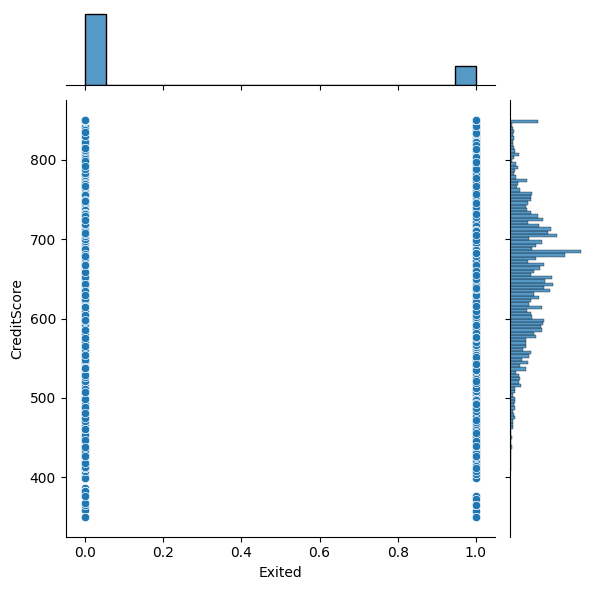

In [81]:
sns.jointplot(data=df, x='Exited', y='CreditScore')

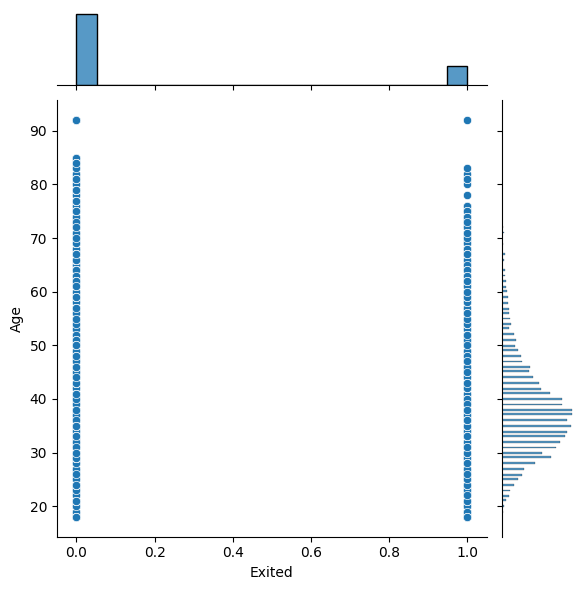

In [82]:
sns.jointplot(data=df, x='Exited', y='Age')

In [83]:
le = preprocessing.LabelEncoder()
cols = ['Gender', 'Geography', 'Surname']

for col in cols:
    df[col] = le.fit_transform(df[col])
    test[col] = le.fit_transform(test[col])
    print(le.classes_)

df.head()

['Female' 'Male']
['France' 'Germany' 'Spain']
['Abazu' 'Abbie' 'Abbott' ... 'Zuev' 'Zuyev' 'Zuyeva']


id  CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0   0    15674932     1924          668          0       1  33.0       3   
1   1    15749177     1925          627          0       1  33.0       1   
2   2    15694510     1178          678          0       1  40.0      10   
3   3    15741417     1299          581          0       1  34.0       2   
4   4    15766172      467          716          2       1  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [84]:
test.head()

id  CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0  165034    15773898     1482          586          0       0  23.0       2   
1  165035    15782418     1812          683          0       0  46.0       2   
2  165036    15807120     1246          656          0       0  34.0       7   
3  165037    15808905     1832          681          0       1  36.0       8   
4  165038    15607314     1079          752          1       1  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

/Users/ammoa380/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


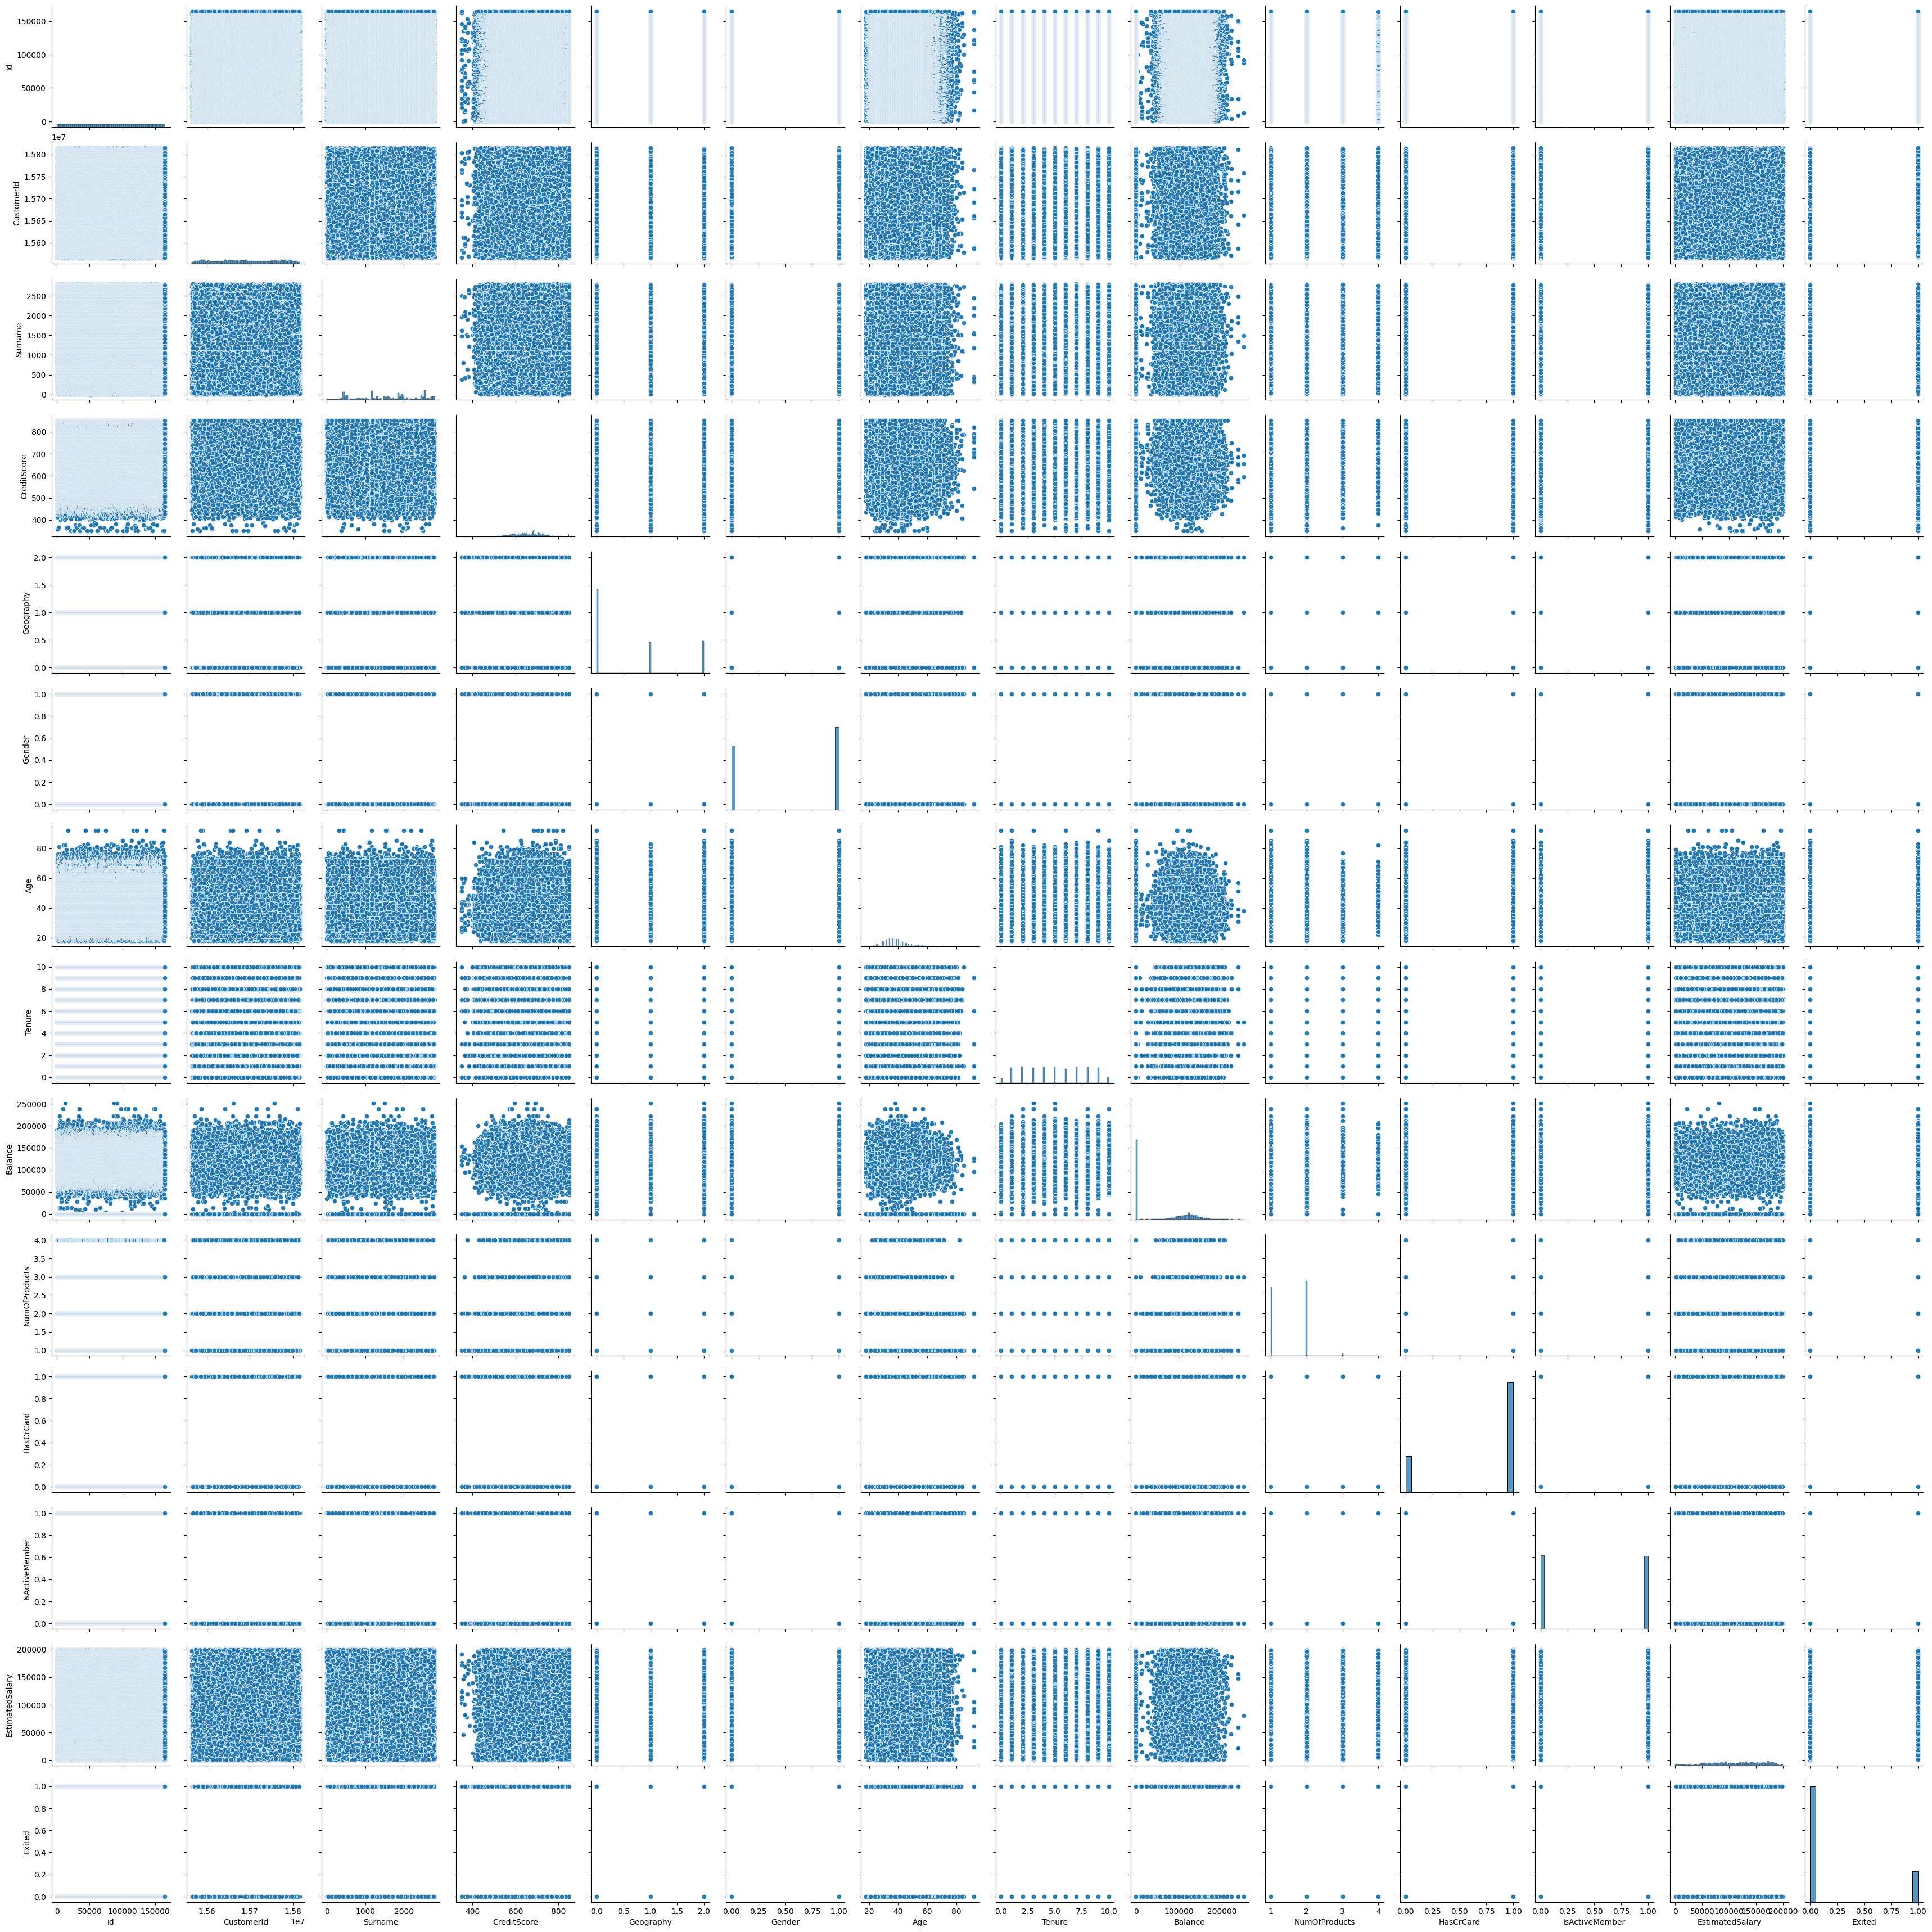

In [85]:
sns.pairplot(data=df)

/Users/ammoa380/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


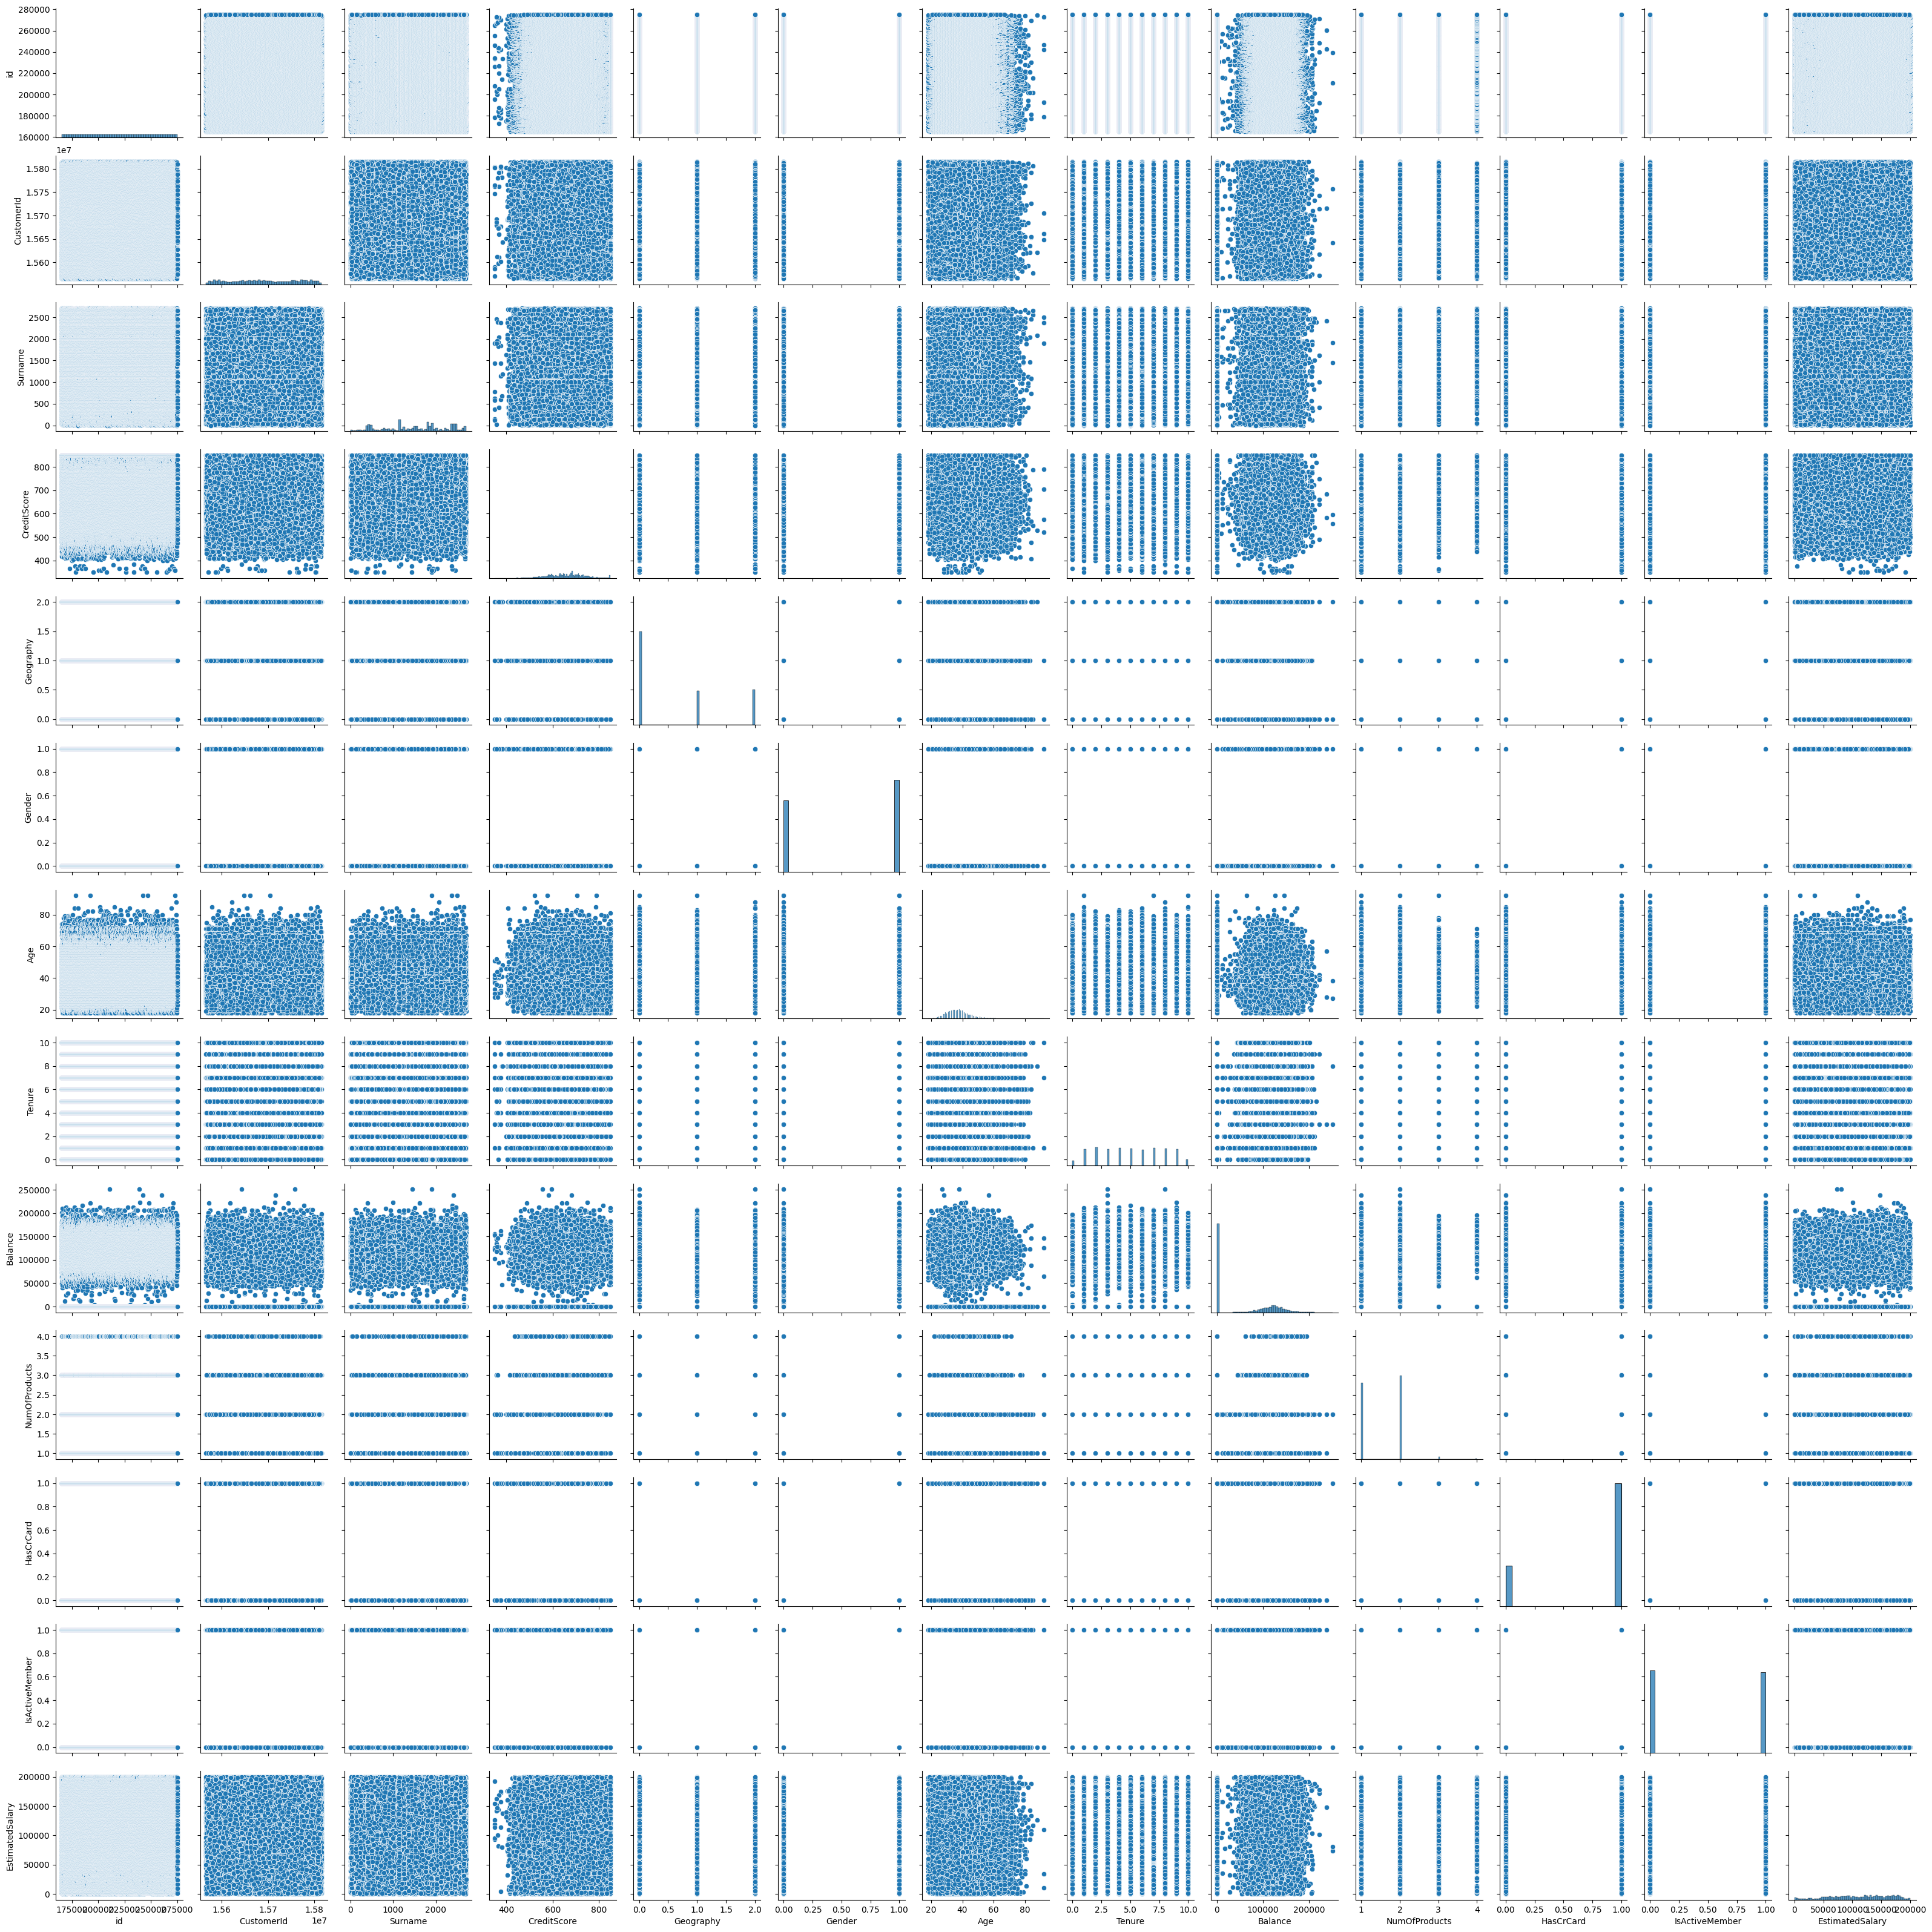

In [86]:
sns.pairplot(data=test)

In [87]:
test.corr()

id  CustomerId   Surname  CreditScore  Geography  \
id               1.000000   -0.001279 -0.002011     0.001981   0.003496   
CustomerId      -0.001279    1.000000 -0.000337     0.005603   0.000370   
Surname         -0.002011   -0.000337  1.000000     0.012612  -0.038212   
CreditScore      0.001981    0.005603  0.012612     1.000000   0.006127   
Geography        0.003496    0.000370 -0.038212     0.006127   1.000000   
Gender           0.003531   -0.001406  0.005892    -0.001746  -0.009760   
Age              0.000239   -0.000605 -0.021006    -0.011123   0.027582   
Tenure           0.002569    0.003037 -0.001055     0.009643  -0.002138   
Balance          0.003562   -0.013551 -0.127528     0.006956   0.134609   
NumOfProducts   -0.002232    0.006124  0.053593     0.012234  -0.029027   
HasCrCard        0.000628   -0.006655  0.008812     0.000915  -0.013579   
IsActiveMember   0.003694   -0.001691  0.002392     0.014243  -0.007610   
EstimatedSalary  0.003192    0.006178  0.040602     0.004896   0.005491   

                   Gender       Age    Tenure   Balance  NumOfProducts  \
id               0.003531  0.000239  0.002569  0.003562      -0.002232   
CustomerId      -0.001406 -0.000605  0.003037 -0.013551       0.006124   
Surname          0.005892 -0.021006 -0.001055 -0.127528       0.053593   
CreditScore     -0.001746 -0.011123  0.009643  0.006956       0.012234   
Geography       -0.009760  0.027582 -0.002138  0.134609      -0.029027   
Gender           1.000000 -0.064234 -0.002342 -0.020910       0.036204   
Age             -0.064234  1.000000 -0.012733  0.066805      -0.106720   
Tenure          -0.002342 -0.012733  1.000000 -0.016486       0.015245   
Balance         -0.020910  0.066805 -0.016486  1.000000      -0.366908   
NumOfProducts    0.036204 -0.106720  0.015245 -0.366908       1.000000   
HasCrCard        0.003826 -0.015946 -0.002249 -0.022470       0.004228   
IsActiveMember   0.034351  0.004463 -0.005077 -0.012252       0.039955   
EstimatedSalary -0.007438 -0.000335  0.004098  0.009842      -0.006374   

                 HasCrCard  IsActiveMember  EstimatedSalary  
id                0.000628        0.003694         0.003192  
CustomerId       -0.006655       -0.001691         0.006178  
Surname           0.008812        0.002392         0.040602  
CreditScore       0.000915        0.014243         0.004896  
Geography        -0.013579       -0.007610         0.005491  
Gender            0.003826        0.034351        -0.007438  
Age              -0.015946        0.004463        -0.000335  
Tenure           -0.002249       -0.005077         0.004098  
Balance          -0.022470       -0.012252         0.009842  
NumOfProducts     0.004228        0.039955        -0.006374  
HasCrCard         1.000000       -0.027275         0.003712  
IsActiveMember   -0.027275        1.000000        -0.009863  
EstimatedSalary   0.003712       -0.009863         1.000000

In [88]:
df.corr()

id  CustomerId   Surname  CreditScore  Geography  \
id               1.000000   -0.000387  0.000349    -0.001201   0.005552   
CustomerId      -0.000387    1.000000  0.005206     0.007364  -0.001249   
Surname          0.000349    0.005206  1.000000     0.008644  -0.037725   
CreditScore     -0.001201    0.007364  0.008644     1.000000   0.005379   
Geography        0.005552   -0.001249 -0.037725     0.005379   1.000000   
Gender           0.001929   -0.001944  0.002096     0.002310  -0.012092   
Age              0.004039    0.002696 -0.020685    -0.008918   0.034110   
Tenure          -0.002560   -0.001252 -0.002186     0.000942   0.000276   
Balance          0.000606   -0.008348 -0.132806     0.006973   0.134642   
NumOfProducts   -0.000094    0.004380  0.054838     0.011361  -0.025123   
HasCrCard       -0.004706   -0.005469  0.011018    -0.002828  -0.016715   
IsActiveMember   0.000418   -0.002934  0.003234     0.014790  -0.003493   
EstimatedSalary -0.001552    0.002891  0.037806    -0.001820  -0.004102   
Exited           0.002512   -0.009947 -0.028328    -0.027383   0.053343   

                   Gender       Age    Tenure   Balance  NumOfProducts  \
id               0.001929  0.004039 -0.002560  0.000606      -0.000094   
CustomerId      -0.001944  0.002696 -0.001252 -0.008348       0.004380   
Surname          0.002096 -0.020685 -0.002186 -0.132806       0.054838   
CreditScore      0.002310 -0.008918  0.000942  0.006973       0.011361   
Geography       -0.012092  0.034110  0.000276  0.134642      -0.025123   
Gender           1.000000 -0.063139  0.008767 -0.014699       0.026098   
Age             -0.063139  1.000000 -0.010830  0.064318      -0.102195   
Tenure           0.008767 -0.010830  1.000000 -0.009481       0.007335   
Balance         -0.014699  0.064318 -0.009481  1.000000      -0.361033   
NumOfProducts    0.026098 -0.102195  0.007335 -0.361033       1.000000   
HasCrCard        0.006418 -0.012111  0.005327 -0.018584       0.005482   
IsActiveMember   0.033722  0.003320 -0.005532 -0.015073       0.039736   
EstimatedSalary -0.007778 -0.005399  0.000971  0.008586      -0.004285   
Exited          -0.146442  0.340768 -0.019565  0.129743      -0.214554   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
id               -0.004706        0.000418        -0.001552  0.002512  
CustomerId       -0.005469       -0.002934         0.002891 -0.009947  
Surname           0.011018        0.003234         0.037806 -0.028328  
CreditScore      -0.002828        0.014790        -0.001820 -0.027383  
Geography        -0.016715       -0.003493        -0.004102  0.053343  
Gender            0.006418        0.033722        -0.007778 -0.146442  
Age              -0.012111        0.003320        -0.005399  0.340768  
Tenure            0.005327       -0.005532         0.000971 -0.019565  
Balance          -0.018584       -0.015073         0.008586  0.129743  
NumOfProducts     0.005482        0.039736        -0.004285 -0.214554  
HasCrCard         1.000000       -0.021034         0.004438 -0.022141  
IsActiveMember   -0.021034        1.000000        -0.008080 -0.210237  
EstimatedSalary   0.004438       -0.008080         1.000000  0.018827  
Exited           -0.022141       -0.210237         0.018827  1.000000

In [89]:
df.head()

id  CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0   0    15674932     1924          668          0       1  33.0       3   
1   1    15749177     1925          627          0       1  33.0       1   
2   2    15694510     1178          678          0       1  40.0      10   
3   3    15741417     1299          581          0       1  34.0       2   
4   4    15766172      467          716          2       1  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  int64  
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  int64  
 5   Gender           165034 non-null  int64  
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 17.6 MB


In [306]:
selected_features = ['Age', 'NumOfProducts', 'IsActiveMember', 'Balance']
X = df[selected_features]
y = df['Exited']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

In [308]:
model = XGBRegressor(max_depth=2, subsample=0.8, n_estimators = 1000, learning_rate=0.01, min_child_weight=1, reg_alpha=0, reg_lambda=1, early_stopping_rounds=5)
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [312]:
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [313]:
testdf = test[['Age', 'NumOfProducts', 'IsActiveMember', 'Balance']]

In [314]:
submissions_pred = model.predict(testdf)

In [315]:
dfnew = pd.DataFrame({"id": test_ids.values, "Exited": submissions_pred})

In [1]:
dfnew.to_csv("submission.csv", index=False)

NameError: name 'dfnew' is not defined